Machine Learning 



*   **Domain: Recommender Systems and IR**
*   **Topic:  career Recommendation System**




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 **Problem Statement**
 A career recommender system using machine learning algorithms recommend suitable careers based on the performance in respective subjects, intelligence quotient and emotional quotient. The Hybrid recommendation approach/system could be the best method to help students to choose the right courses in preparation for their future career. 
 

#Step 1: Import libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [71]:
df = pd.read_csv("/content/drive/MyDrive/Projects/data.csv")

In [72]:
df.iloc[:,14:38]

,can work long time before system?,self-learning capability?,Extra-courses did,certifications,workshops,talenttests taken?,olympiads,reading and writing skills,memory capability score,Interested subjects,...,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert
0,yes,yes,yes,shell programming,cloud computing,no,yes,excellent,excellent,cloud computing,...,no,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no
1,yes,no,yes,machine learning,database security,no,no,poor,medium,networks,...,yes,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes
2,yes,no,yes,app development,web technologies,no,yes,poor,excellent,hacking,...,yes,Travel,Work,no,stubborn,Management,work,hard worker,no,yes
3,no,yes,no,python,data science,yes,no,medium,excellent,networks,...,no,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes
4,no,no,no,app development,cloud computing,no,no,poor,excellent,Computer Architecture,...,yes,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,yes,no,no,app development,cloud computing,yes,no,poor,excellent,Software Engineering,...,yes,Journals,Work,yes,stubborn,Management,salary,smart worker,yes,no
19996,yes,no,no,full stack,game development,no,yes,medium,excellent,Management,...,yes,Cookbooks,salary,no,stubborn,Management,salary,hard worker,no,yes
19997,yes,yes,yes,information security,database security,yes,yes,medium,excellent,networks,...,yes,Drama,Work,yes,gentle,Technical,work,hard worker,no,yes
19998,no,no,no,full stack,cloud computing,no,yes,poor,poor,IOT,...,no,Travel,Work,no,gentle,Management,work,smart worker,yes,no


In [73]:
df.iloc[:,:14]

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points
0,69,63,78,87,94,94,87,84,61,9,4,0,4,8
1,78,62,73,60,71,70,73,84,91,12,7,1,2,3
2,71,86,91,87,61,81,72,72,94,11,1,4,1,3
3,76,87,60,84,89,73,62,88,69,7,1,1,2,5
4,92,62,90,67,71,89,73,71,73,4,5,4,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69,4,2,6,1,8
19996,80,69,83,87,82,66,66,92,67,7,8,0,9,8
19997,83,70,80,87,64,85,69,94,88,7,3,6,2,3
19998,68,87,91,88,66,74,61,87,61,5,1,4,9,5


#Step 2: Descriptive Statistics

In [74]:
#features 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Acedamic percentage in Operating Systems  20000 non-null  int64 
 1   percentage in Algorithms                  20000 non-null  int64 
 2   Percentage in Programming Concepts        20000 non-null  int64 
 3   Percentage in Software Engineering        20000 non-null  int64 
 4   Percentage in Computer Networks           20000 non-null  int64 
 5   Percentage in Electronics Subjects        20000 non-null  int64 
 6   Percentage in Computer Architecture       20000 non-null  int64 
 7   Percentage in Mathematics                 20000 non-null  int64 
 8   Percentage in Communication skills        20000 non-null  int64 
 9   Hours working per day                     20000 non-null  int64 
 10  Logical quotient rating                   2000

In [75]:
df.shape

(20000, 39)

In [76]:
#Studing dataset: Descriptive Analysis
# Statistical summary
df.describe()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,77.002300,76.948200,77.017550,77.094500,76.958200,77.015550,77.069850,76.913100,76.921450,7.985950,4.995050,2.992650,5.004750,5.012800
std,10.085697,10.101733,10.134815,10.087837,10.020088,10.168888,10.069059,10.138555,10.103494,2.593798,2.578383,2.005791,2.576831,2.588875
min,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,4.000000,1.000000,0.000000,1.000000,1.000000
25%,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,6.000000,3.000000,1.000000,3.000000,3.000000
50%,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,8.000000,5.000000,3.000000,5.000000,5.000000
75%,86.000000,86.000000,86.000000,86.000000,85.000000,86.000000,86.000000,86.000000,86.000000,10.000000,7.000000,5.000000,7.000000,7.000000
max,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,12.000000,9.000000,6.000000,9.000000,9.000000


**Extracting dependent and independent variables:**

In [78]:
x=df.iloc[:,:38]  #Independent
y=df.iloc[:,-1:]  #dependent

**checking the missing values**

In [79]:
df.isnull().values.any()

False

#Step 3: Data Preprocessing

#skewness
if the value is 0 then our data column is symmetric 
if the value is -ve then our data column is left skewed
if the value is +ve then our data column is right skewed

In [81]:
df.skew()

Acedamic percentage in Operating Systems    0.006282
percentage in Algorithms                    0.004059
Percentage in Programming Concepts         -0.008462
Percentage in Software Engineering         -0.015315
Percentage in Computer Networks            -0.000460
Percentage in Electronics Subjects         -0.001746
Percentage in Computer Architecture        -0.004576
Percentage in Mathematics                   0.009597
Percentage in Communication skills          0.010053
Hours working per day                       0.010065
Logical quotient rating                     0.007082
hackathons                                  0.008745
coding skills rating                        0.003866
public speaking points                     -0.008027
dtype: float64

#Label Encoding

**categorical to computer readable**

In [82]:
label_encoder = LabelEncoder()
df['can work long time before system?']= label_encoder.fit_transform(df['can work long time before system?']) 
df['Interested Type of Books']= label_encoder.fit_transform(df['Interested Type of Books'])

df['Gentle or Tuff behaviour?']= label_encoder.fit_transform(df['Gentle or Tuff behaviour?']) 
df['Management or Technical']= label_encoder.fit_transform(df['Management or Technical'])
df['Salary/work']= label_encoder.fit_transform(df['Salary/work'])
df['hard/smart worker']= label_encoder.fit_transform(df['hard/smart worker'])
df['worked in teams ever?']= label_encoder.fit_transform(df['worked in teams ever?'])
df['self-learning capability?']= label_encoder.fit_transform(df['self-learning capability?']) 
df['Extra-courses did']= label_encoder.fit_transform(df['Extra-courses did'])
df['certifications']= label_encoder.fit_transform(df['certifications'])
df['workshops']= label_encoder.fit_transform(df['workshops'])
df['talenttests taken?']= label_encoder.fit_transform(df['talenttests taken?']) 
df['olympiads']= label_encoder.fit_transform(df['olympiads'])
df['reading and writing skills']= label_encoder.fit_transform(df['reading and writing skills'])
df['memory capability score']= label_encoder.fit_transform(df['memory capability score'])
df['Interested subjects']= label_encoder.fit_transform(df['Interested subjects']) 
df['Job/Higher Studies?']= label_encoder.fit_transform(df['Job/Higher Studies?'])
df['Type of company want to settle in?']= label_encoder.fit_transform(df['Type of company want to settle in?'])
df['Taken inputs from seniors or elders']= label_encoder.fit_transform(df['Taken inputs from seniors or elders']) 
df['interested in games']= label_encoder.fit_transform(df['interested in games'])
df['Introvert']= label_encoder.fit_transform(df['Introvert'])
# df['interested career area']= label_encoder.fit_transform(df['interested career area'])
df['Suggested Job Role']= label_encoder.fit_transform(df['Suggested Job Role'])
print("############################################")
print(df['can work long time before system?'].unique())
print(df['Interested Type of Books'].unique())
print(df['Gentle or Tuff behaviour?'].unique())
print(df['Management or Technical'].unique())
print(df['Salary/work'].unique())
print(df['hard/smart worker'].unique())
print(df['worked in teams ever?'].unique())
print(df['self-learning capability?'].unique())
print(df['Extra-courses did'].unique())
print(df['certifications'].unique())
print(df['workshops'].unique())
print(df['talenttests taken?'].unique())
print(df['olympiads'].unique())
print(df['reading and writing skills'].unique())
print(df['memory capability score'].unique())
print(df['Interested subjects'].unique())
print(df['Job/Higher Studies?'].unique())
print(df['Type of company want to settle in?'].unique())
print(df['Taken inputs from seniors or elders'].unique())
print(df['interested in games'].unique())
print(df['Suggested Job Role'].unique())
 


############################################
[1 0]
[21  5 29 23  7 27 10 18 22  1 30  3 19  8 17 15  2  9 16 11  0 12  6 26
 28 13  4 14 24 25 20]
[1 0]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[1 0]
[8 5 0 6 7 4 3 1 2]
[0 2 7 1 6 4 3 5]
[0 1]
[1 0]
[0 2 1]
[0 1 2]
[4 7 6 0 9 8 1 5 3 2]
[0 1]
[8 4 5 7 9 0 6 3 1 2]
[0 1]
[0 1]
[ 7 18 28  2 25  1  4 14 32 21 33 11  3 31 20 13 19  9 26 27 16  5 22 10
 30 12  8  0  6 15 23 29 17 24]


#Step 4: Data Visualization

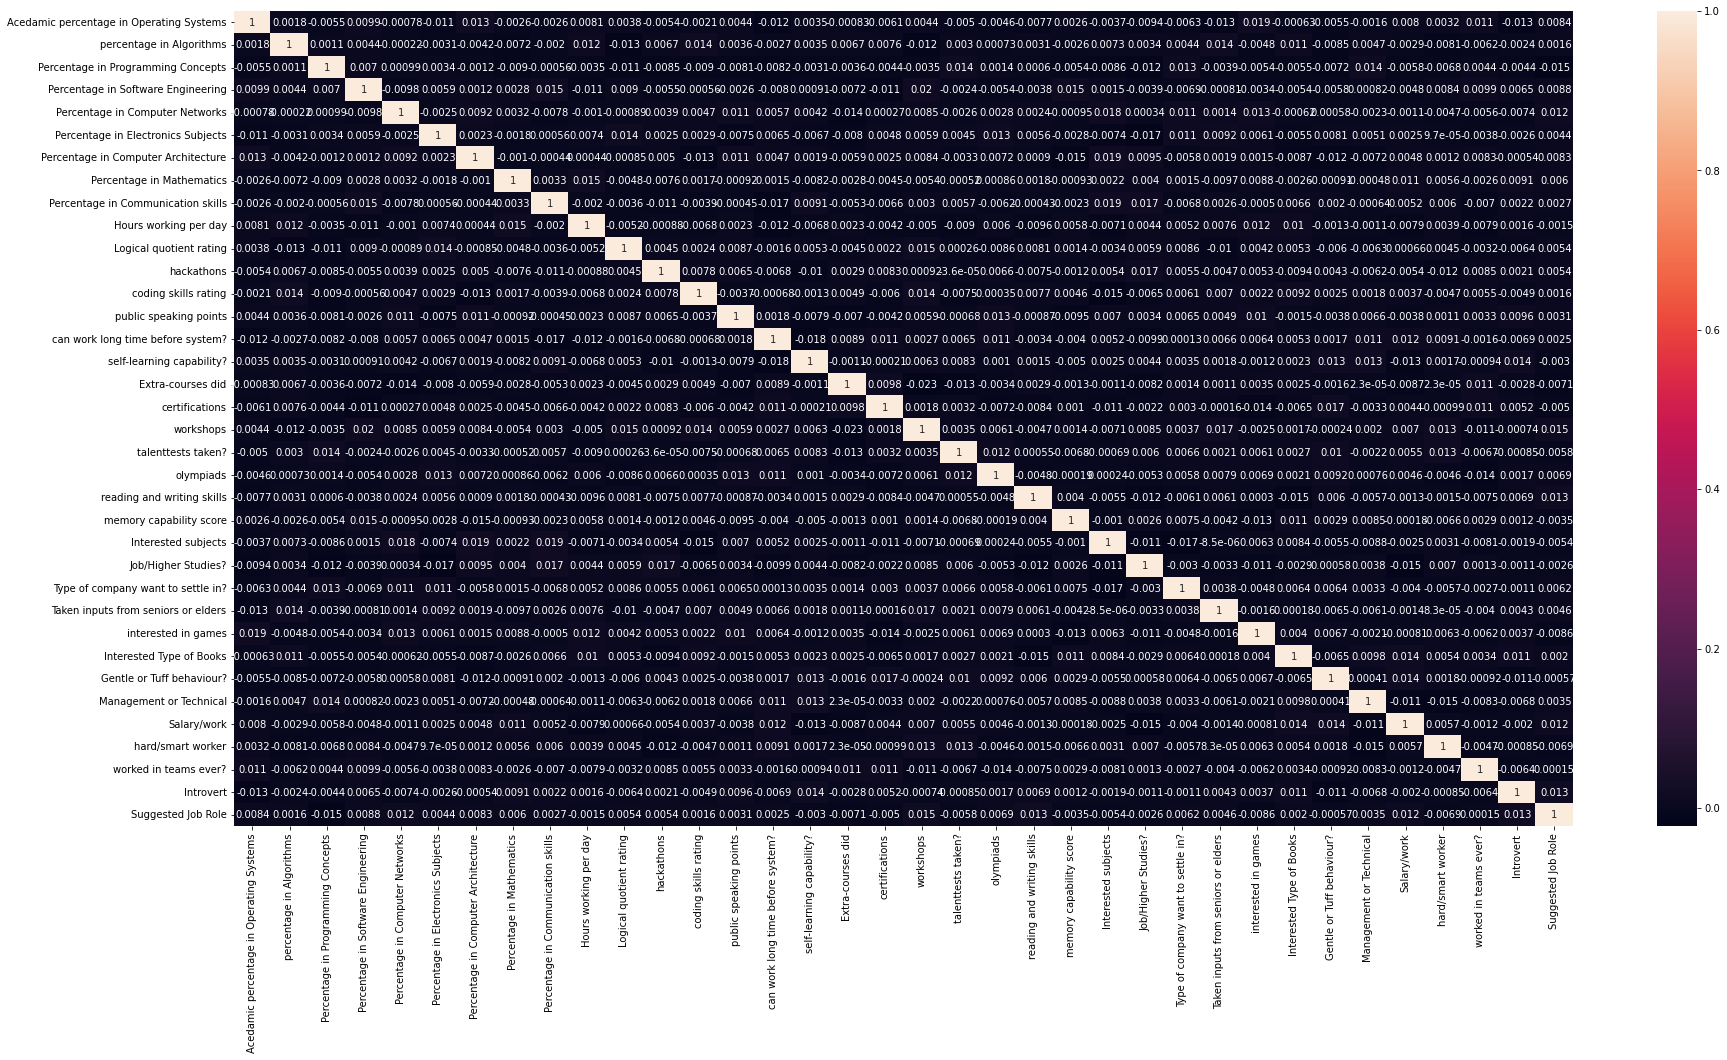

In [44]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), annot = True)
plt.show()

**Inference**
From the correlation heatmap, we can see that there is a no high correlation between Suggested job role column which is Dependent and any other columns which are Independent.

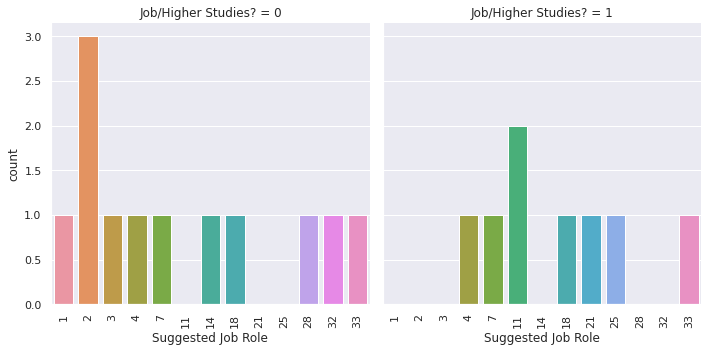

In [46]:
sns.set(style="darkgrid")
g = sns.catplot(x="Suggested Job Role",col="Job/Higher Studies?",data=df.head(20), kind="count");
g.set_xticklabels(rotation=90);


**inference**
in the graphs we can say that candidates which are in business system analysts are nill in doing job/higherstudies and highest are information security analysts

**Normalizing Data**

In [85]:
data1=df.iloc[:,:14]

In [86]:
normalized_data = Normalizer().fit_transform(data1)
print(normalized_data.shape)

(20000, 14)


In [87]:
normalized_data

array([[0.28508989, 0.26029947, 0.32227553, ..., 0.        , 0.01652695,
        0.0330539 ],
       [0.34997994, 0.27818918, 0.32754533, ..., 0.00448692, 0.00897384,
        0.01346077],
       [0.29501244, 0.35733901, 0.37811453, ..., 0.01662042, 0.0041551 ,
        0.01246531],
       ...,
       [0.3430836 , 0.28934762, 0.33068299, ..., 0.02480122, 0.00826707,
        0.01240061],
       [0.29479246, 0.37716094, 0.39450167, ..., 0.01734073, 0.03901665,
        0.02167592],
       [0.31140896, 0.32847247, 0.31567484, ..., 0.00426588, 0.02986113,
        0.02559526]])

In [88]:
df1 = np.append(normalized_data,data,axis=1)
df1.shape

(20000, 37)

**Splitting the Dataset into the Training set and Test set**

In [89]:
x1 = pd.DataFrame(df,columns=['Acedamic percentage in Operating Systems', 'percentage in Algorithms',
       'Percentage in Programming Concepts',
       'Percentage in Software Engineering', 'Percentage in Computer Networks',
       'Percentage in Electronics Subjects',
       'Percentage in Computer Architecture', 'Percentage in Mathematics',
       'Percentage in Communication skills', 'Hours working per day',
       'Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'can work long time before system?',
       'self-learning capability?', 'Extra-courses did', 'certifications',
       'workshops', 'talenttests taken?', 'olympiads',
       'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ', 'Job/Higher Studies?',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'interested in games',
       'Interested Type of Books','Gentle or Tuff behaviour?',
       'Management or Technical', 'Salary/work', 'hard/smart worker',
       'worked in teams ever?', 'Introvert'])



In [53]:
y1 = pd.DataFrame(df,columns=['Suggested Job Role'])

In [90]:
X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=0)

print("len of X_train is %s" % (len(X_train)))
print("len of X_test is %s" % (len(X_test)))
print("len of y_train is %s" % (len(y_train)))
print("len of y_test is %s" % (len(y_test)))

len of X_train is 16000
len of X_test is 4000
len of y_train is 16000
len of y_test is 4000


In [91]:
X_train

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert
17815,79,88,74,68,88,67,60,79,87,10,...,8,0,0,16,1,1,1,0,1,1
18370,65,85,61,90,75,88,86,88,85,7,...,8,0,1,8,0,0,1,0,1,0
1379,78,93,74,86,83,93,93,62,61,4,...,9,0,1,15,0,1,1,0,0,1
14763,79,62,77,74,64,91,90,83,94,12,...,0,0,1,27,1,1,1,0,0,1
7346,83,64,64,84,64,77,70,92,87,8,...,4,1,0,14,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,73,78,91,83,65,93,88,86,71,4,...,2,1,0,30,0,0,0,1,1,1
19648,84,71,79,70,74,87,67,61,63,10,...,4,0,1,22,0,0,0,0,0,0
9845,71,68,83,94,80,92,93,64,71,4,...,7,0,0,21,1,0,1,0,0,1
10799,93,75,85,90,83,92,89,79,94,11,...,9,0,1,7,0,0,0,1,0,0


**Observation**
we divided Label Encoded data into a training set and test set.
* x_train: features for the training data
* x_test: features for testing data
* y_train: Dependent variables for training data
* y_test: Independent variable for testing data

In [93]:
data = df.iloc[:,:-1].values
label = df.iloc[:,-1].values
len(data[0])

38

In [94]:
label = labelencoder.fit_transform(label)
print(len(label))

20000


In [95]:
y=pd.DataFrame(label,columns=["Suggested Job Role"])
y.head()

,Suggested Job Role
0,7
1,18
2,18
3,28
4,2


# Decision Tree Classifier 

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.2,random_state=10) 

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([24,  6, 15, ...,  2, 17, 28])

In [ ]:
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)

In [ ]:
print("confusion matrics=",cm)
print("  ")
print("accuracy=",accuracy*100)

confusion matrics= [[3 9 1 ..., 3 3 3]
 [4 1 2 ..., 2 2 3]
 [2 3 3 ..., 5 2 4]
 ..., 
 [4 2 2 ..., 2 2 5]
 [5 5 2 ..., 7 5 4]
 [2 5 1 ..., 3 0 0]]
  
accuracy= 2.95


# SVM (Support vector machine) classifier

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC()
clf.fit(X_train, y_train)

In [ ]:
svm_y_pred = clf.predict(X_test)

In [ ]:
svm_cm = confusion_matrix(y_test,svm_y_pred)
svm_accuracy = accuracy_score(y_test,svm_y_pred)

In [ ]:
print("confusion matrics=",svm_cm)
print("  ")
print("accuracy=",svm_accuracy*100)

confusion matrics= [[0 0 1 ..., 1 1 0]
 [0 0 4 ..., 0 0 0]
 [1 0 2 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 1 0]
 [0 0 2 ..., 0 0 0]
 [0 1 2 ..., 0 1 0]]
  
accuracy= 5.175


# Xgboost

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.3,random_state=10) 

In [ ]:
X_train.shape

(14000, 38)

In [ ]:
X_train=pd.to_numeric(X_train.values.flatten())

In [ ]:
X_train=X_train.reshape((14000,38))

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

In [ ]:
xgb_y_pred = clf.predict(X_test)

In [ ]:
xgb_cm = confusion_matrix(y_test,xgb_y_pred)
xgb_accuracy = accuracy_score(y_test,xgb_y_pred)


In [ ]:
print("confusion matrics=",xgb_cm)
print("  ")
print("accuracy=",xgb_accuracy*100)

confusion matrics= [[1 0 1 ..., 1 1 0]
 [1 0 4 ..., 0 0 0]
 [1 0 7 ..., 2 0 0]
 ..., 
 [0 0 1 ..., 2 1 0]
 [0 0 2 ..., 0 3 0]
 [0 1 3 ..., 0 1 0]]
  
accuracy= 6.96666666667
